In [36]:
import lalsimulation as ls
import lal
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

In [44]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 15. #Frequency of the 22 mode at which the signal starts
distance = 500e6*lal.PC_SI
inclination = 153.95
deltaT = 1./4096.

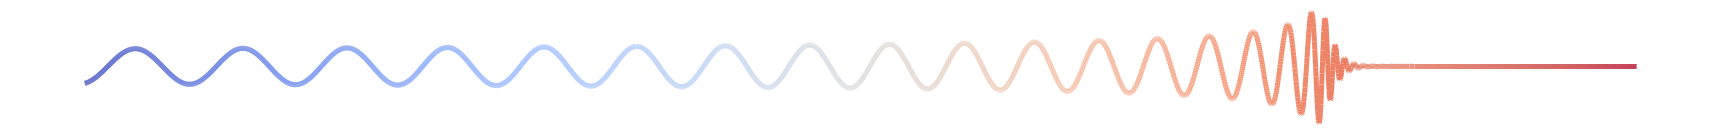

In [50]:
fig = plt.figure(figsize=(24,2))
ax = fig.add_subplot(111)

paramdict = lal.CreateDict()
hp, hc =  ls.SimInspiralChooseTDWaveform(m1, m2,  0., 0., 0., 0., 0., 0., distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, ls.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data
t = np.arange(0,len(h)*deltaT,deltaT)

x = t
y = hp.data.data

cmap = plt.get_cmap('coolwarm')#LinearSegmentedColormap.from_list("", [(1, 0, 0), (0, 0, 1)])

points = np.array([x, y]).T.reshape(-1,1,2)
segments = np.concatenate([points[:-1],points[1:]], axis=1)

lc = LineCollection(segments, cmap=cmap, linewidth=5)
lc.set_array(x)
plt.gca().add_collection(lc)
plt.gca().autoscale()

for side in ['top', 'right', 'bottom', 'left']:
    ax.spines[side].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])



plt.tight_layout()
plt.savefig('./color_gradient_waveform.png', dpi=300)